**Load Libraries and Dataset**

In [4]:
# Install openpyxl (for reading Excel files)
!pip install openpyxl

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Read the Excel file
df = pd.read_excel('glass.xlsx', sheet_name=1)

 **STEP 1: EDA**

In [5]:
# Preview data
print(df.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [6]:
# Summary of dataset
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
# Describe statistics
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.0

In [8]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [9]:
# Check unique values of the target column
print("\nClass Distribution:")
print(df['Type'].value_counts())


Class Distribution:
Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


**STEP 2: Visualization**

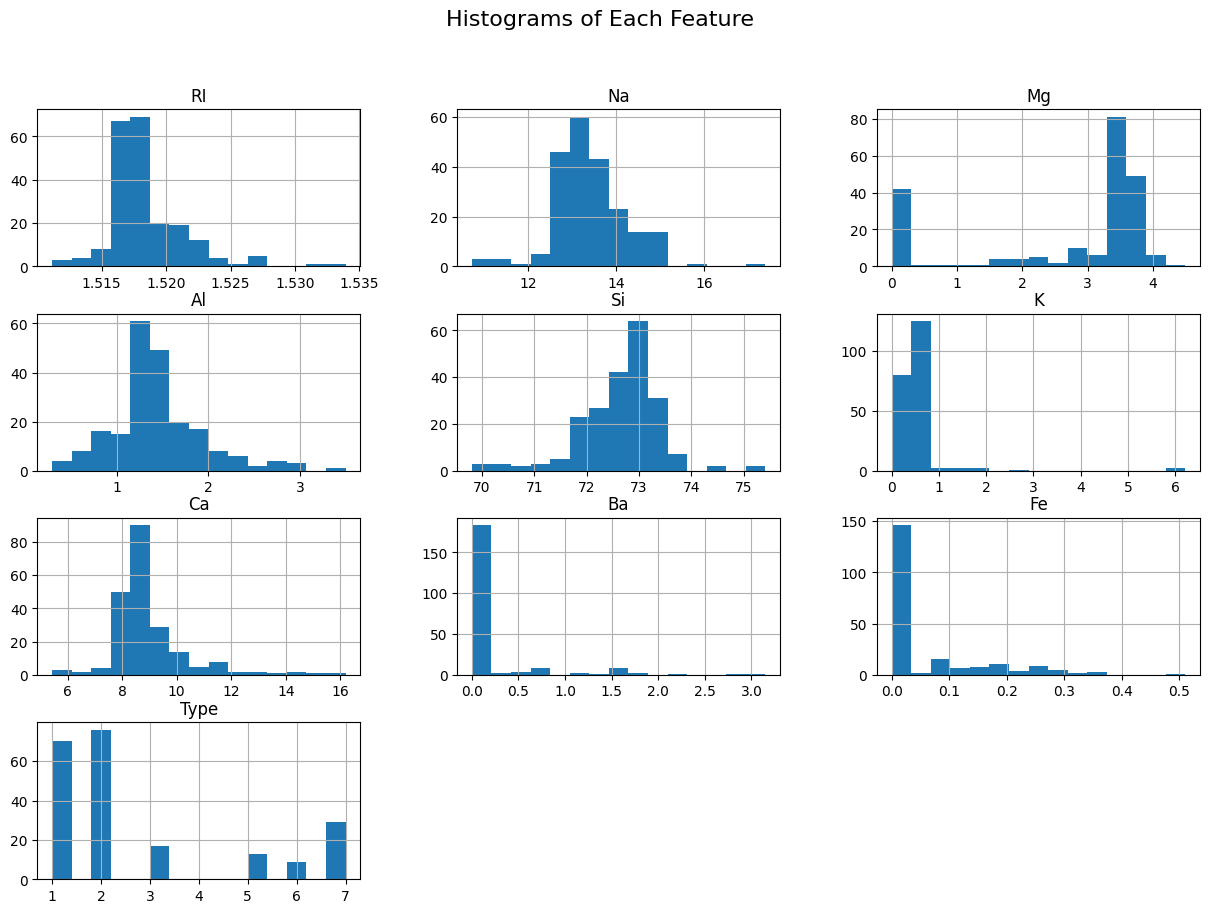

In [10]:
# Histograms for each feature
df.hist(figsize=(15, 10), bins=15)
plt.suptitle("Histograms of Each Feature", fontsize=16)
plt.show()

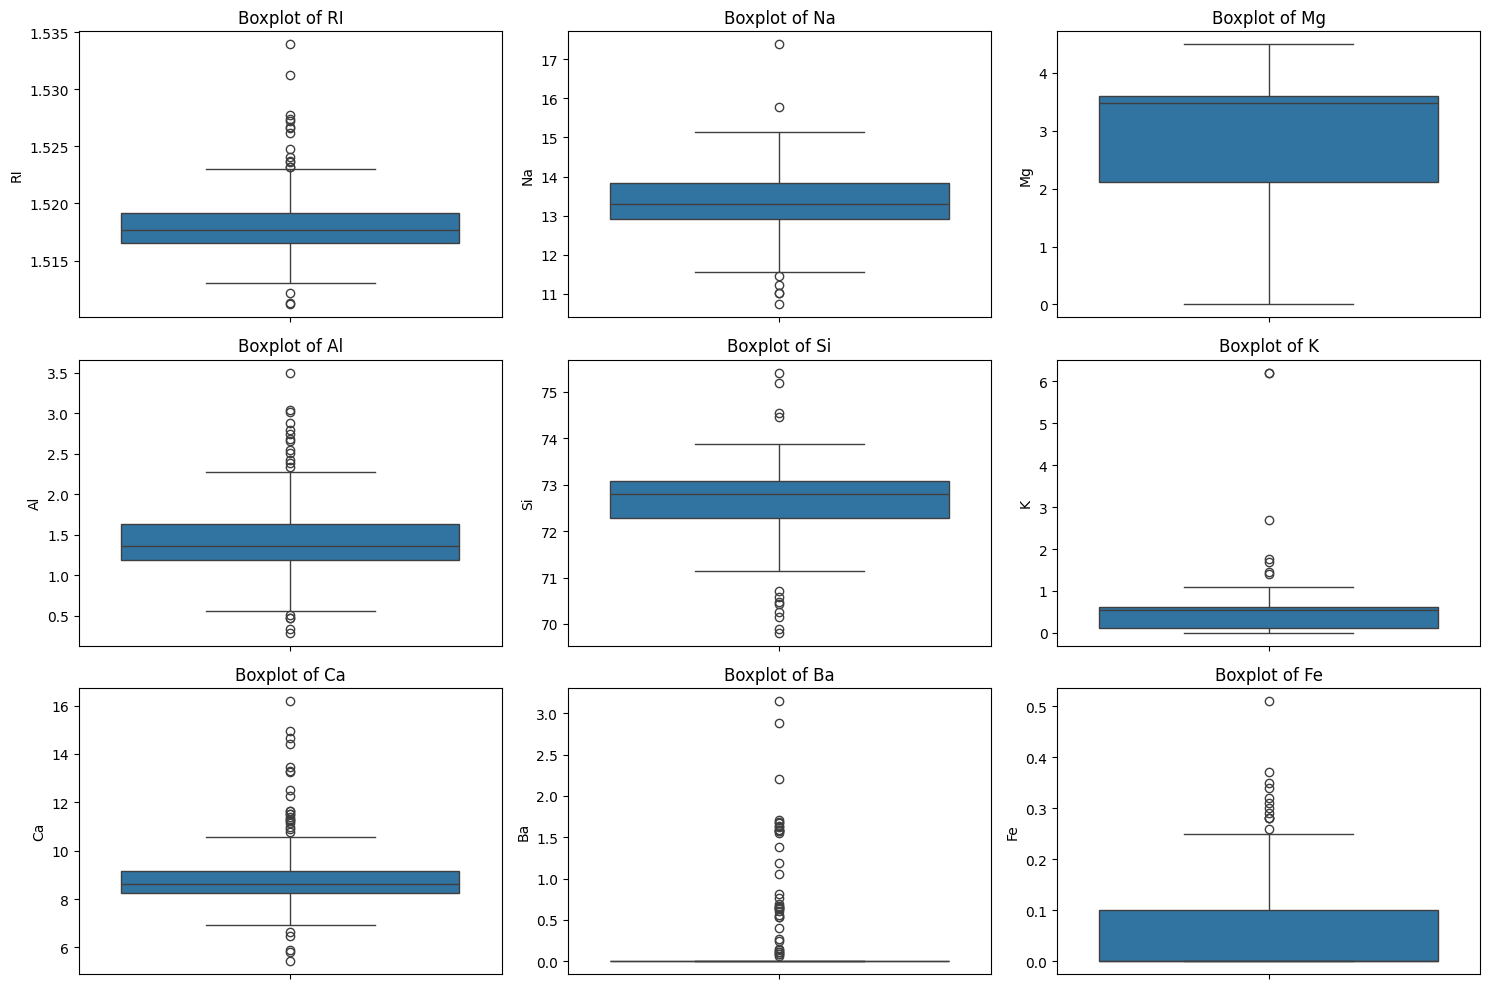

In [11]:
# Boxplots to check for outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

# NOTE:  Should We Treat Outliers in the Glass Dataset?

---

## 🔍 1. First, Do Outliers Exist?

✅ **Yes.**  
When we plotted **boxplots**, some features showed points outside the whiskers → these are **statistical outliers**.

**Example from Glass Dataset:**  
- **RI**, **Na**, **Mg**, **Ca**, **Ba**, **Fe** sometimes have extreme values.

---

## 🔍 2. Should We Always Remove or Treat Outliers?

⚠ **NO. Not Always.** It depends on the situation:

| **Question**                                           | **If Answer is YES → Action**                  |
|--------------------------------------------------------|-----------------------------------------------|
| Are these data entry errors or noise?                  | Remove or fix them                            |
| Are they valid but rare values (natural variation)?    | Keep them                                     |
| Is your model sensitive to outliers? (e.g., Linear Regression, SVM, KNN) | Treat them (e.g., cap/scale/remove) |
| Are you using Tree-based models (e.g., Random Forest)?| Usually no need to treat                      |

---

## 🔍 3. In Our Case: Random Forest

- **Random Forest is NOT sensitive to outliers.**
- It splits the data based on thresholds, and extreme values **do not significantly affect the splits**.
- Treating outliers may **remove important rare cases**, which could harm the model's accuracy.

---

✅ **Final Answer:**  
In the **Glass Dataset with Random Forest**, it is **usually safe to leave the outliers as they are**, unless they are clear errors.



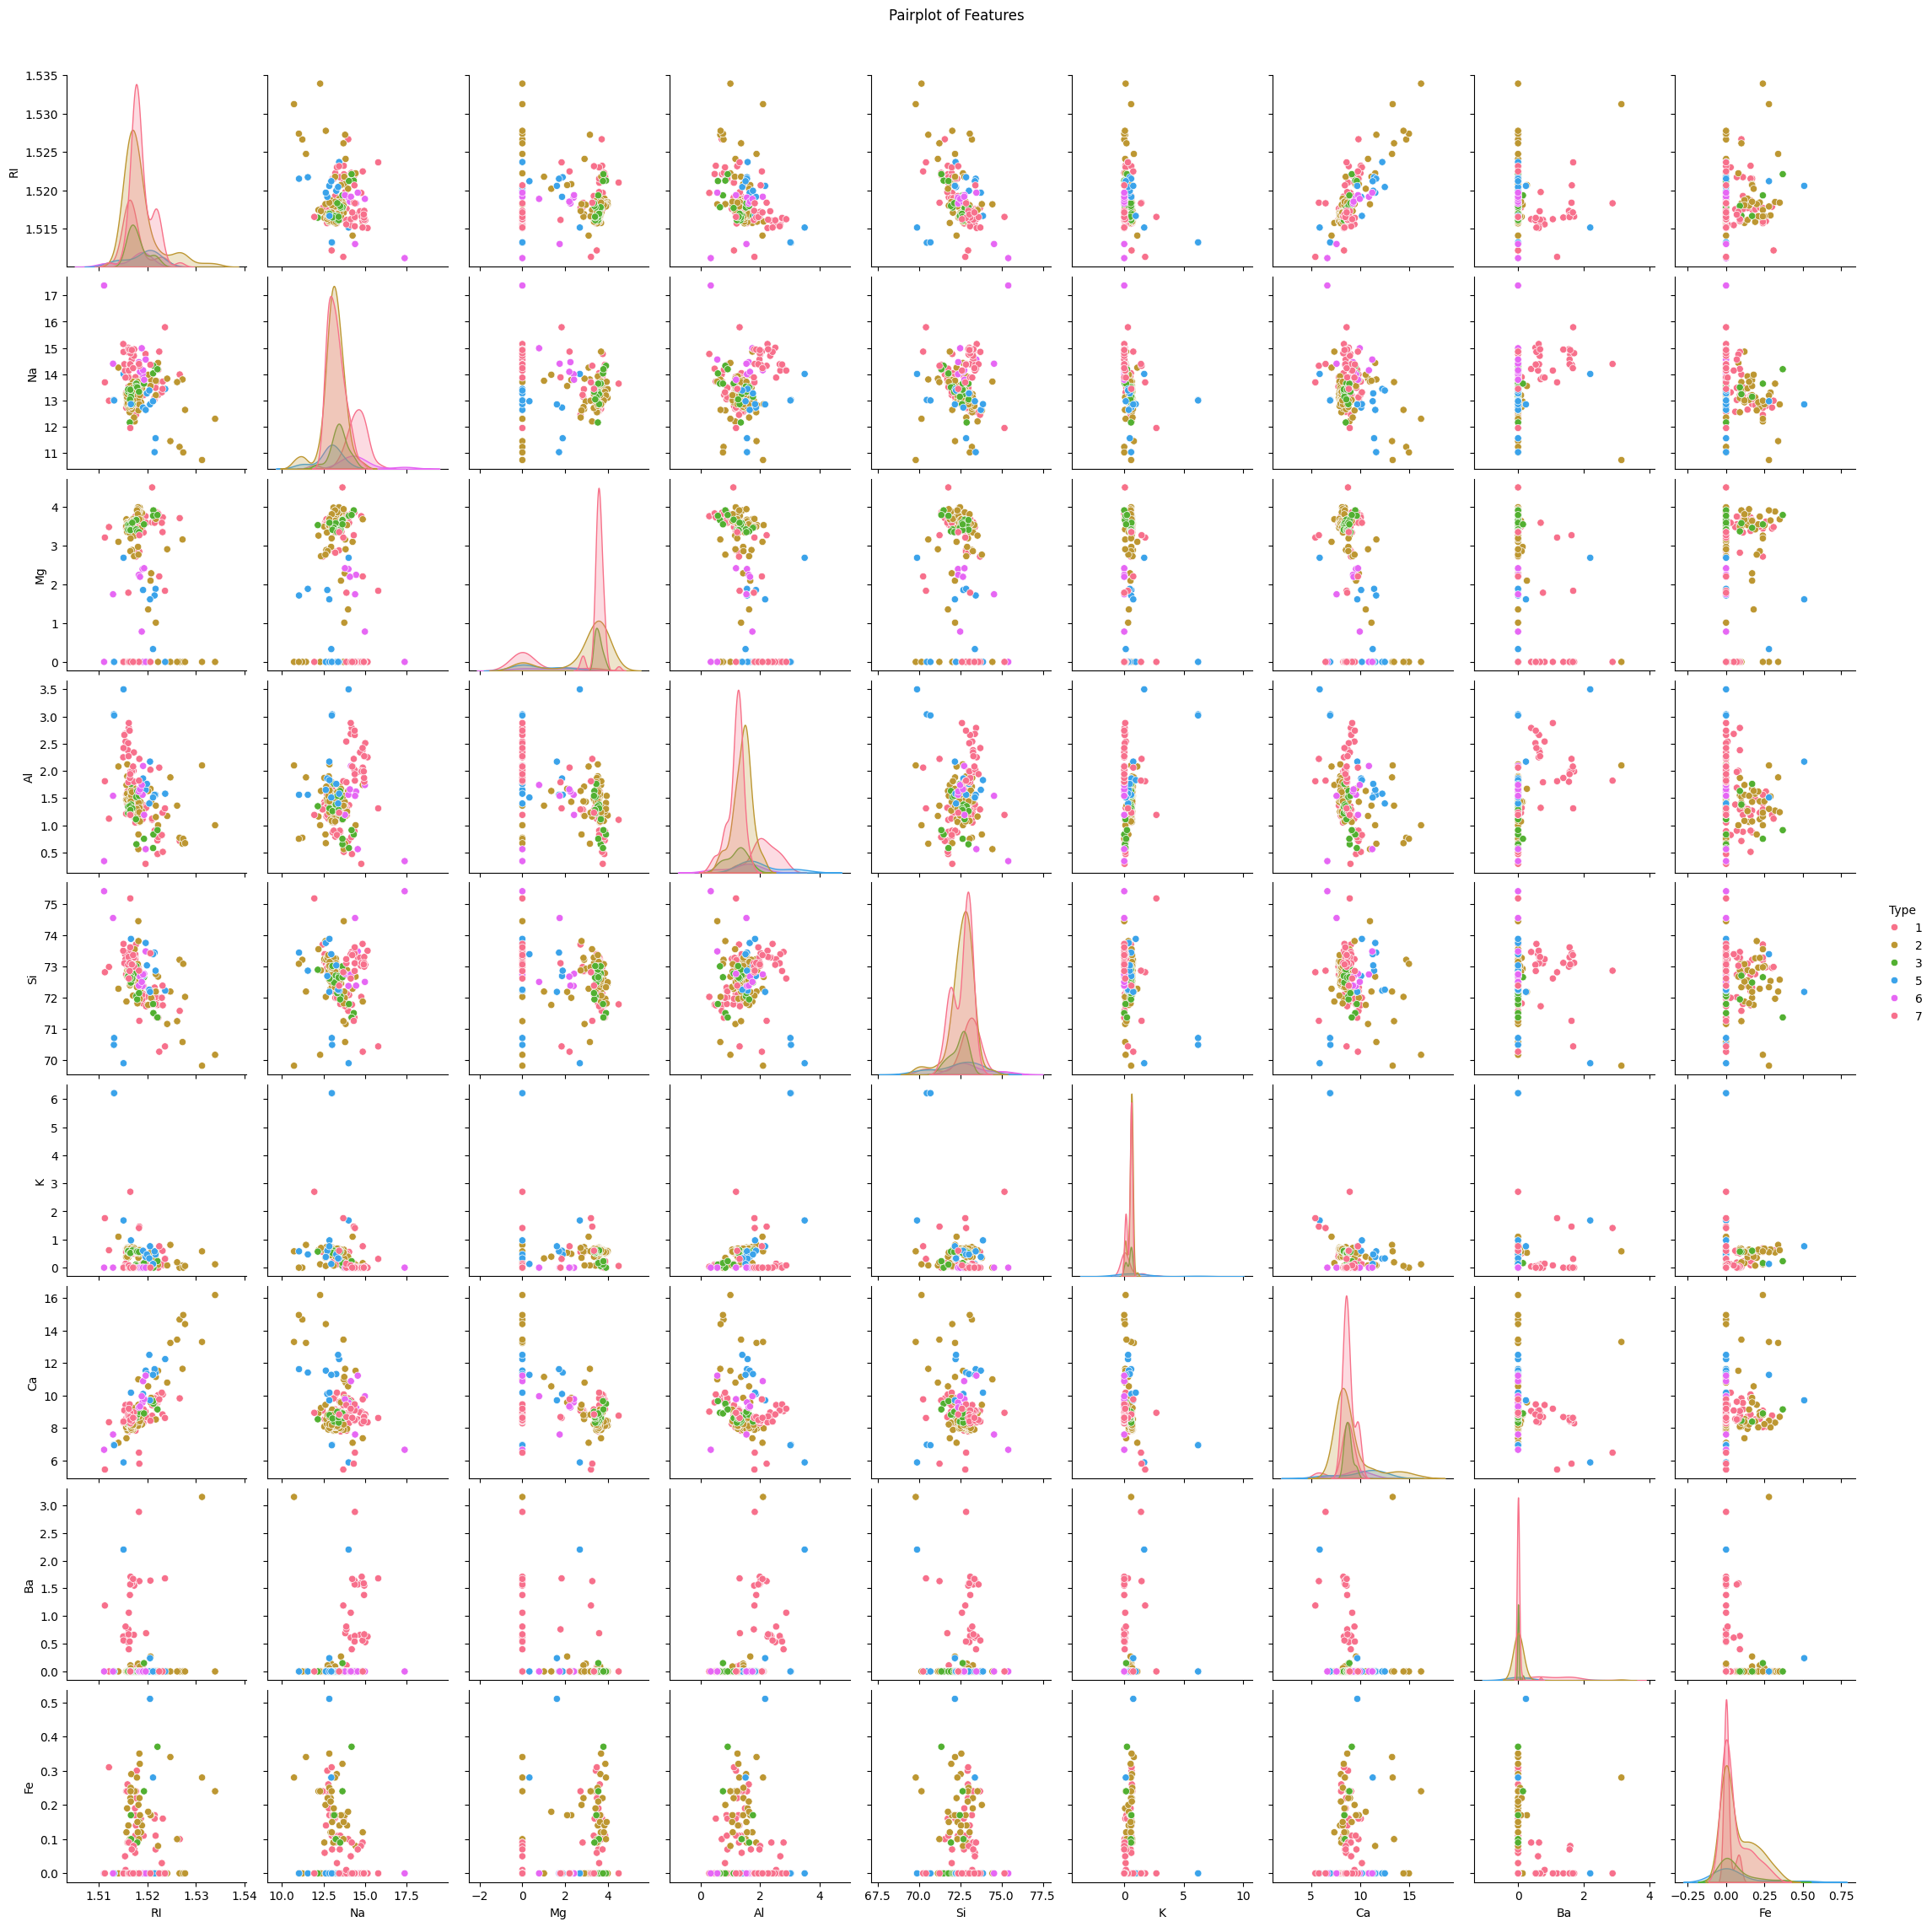

In [12]:
# Pairplot to see relationships
sns.pairplot(df, hue='Type', palette='husl')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

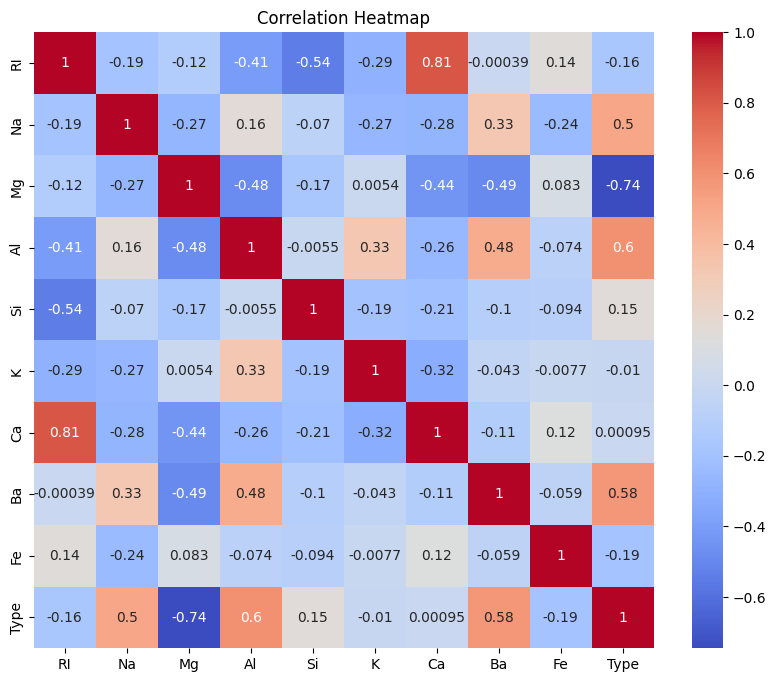

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Analyze any patterns or correlations observed in the data.

After visualizing the data using histograms, boxplots, and pair plots, we can make the following observations:

---

### 1. 📊 Distribution Patterns (Histograms)

| Feature | Distribution Insight |
|--------|-----------------------|
| **RI (Refractive Index)** | Mostly between 1.515 and 1.523. Slightly skewed to the right. |
| **Na (Sodium)** | Centered around 12–14, almost normal distribution, a few higher values. |
| **Mg (Magnesium)** | Some values are 0 → special glass types. Mostly around 3–4. |
| **Al (Aluminum)** | Distributed mostly between 1 and 2.2, bell-shaped. |
| **K (Potassium)** | Mostly low, some high outliers near 6+. |
| **Ca (Calcium)** | Distributed between 7 and 10. |
| **Ba (Barium)** & **Fe (Iron)** | Mostly zero — key features for rare glass types. |
| **Type (Target)** | Imbalanced → most glasses are Type 1, some types like 4 are missing. |

---

### 2. 📦 Outlier Patterns (Boxplots)

From the boxplots, we observe:
- Features like **Ba**, **Fe**, and **Mg** have many **zero values**, but some very high values for special glass types.
- Outliers in features like **K** and **Na** → likely linked to special-purpose glass.

Random Forest models are **robust to outliers**, so we do not remove them.

---

### 3. 🔗 Relationships Between Features (Pair Plot Insights)

Pair plot shows:
- **Na vs Mg**: Clear separation between glass types.
- **RI vs Ba**, **Mg vs Ba**: Clusters form for certain types.
- **Ca vs Al**: Mild linear trend.

These patterns help the Random Forest model split data efficiently.

---

### 4. 🔥 Correlation Heatmap Observations

- **Al** and **K**: Slight positive correlation.
- **Na** and **Mg**: Some negative correlation.
- **Ba** and **Fe**: Very little correlation with other features — but important for classification.
- Most features are **not highly correlated**, which is ideal for decision trees.

---

### 5. ✅ Summary of Key Insights

| Insight | Why it matters |
|--------|------------------|
| Features have diverse distributions | Helps the model learn better decision boundaries |
| Sparse features like Ba, Fe are important | Used to identify rare glass types (Type 7, etc.) |
| Some feature pairs show separation of classes | Useful for classification models |
| Data is imbalanced | Will affect model accuracy → we’ll need to handle this during modeling |

---


**STEP 3: Preprocessing**

In [14]:
# No missing values, no need for imputation.

In [15]:
# Separate features and target
X = df.drop('Type', axis=1)
y = df['Type']

In [16]:
# Optional: Feature scaling (for Boosting comparison)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Show imbalance if any
print("\nClass Distribution in Target Variable:")
print(y.value_counts())


Class Distribution in Target Variable:
Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


**STEP 4: Random Forest Model**

In [18]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [19]:
# Build Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Predictions
y_pred = rf_model.predict(X_test)

In [21]:
# Evaluation
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.95      0.87        21
           2       0.86      0.78      0.82        23
           3       1.00      0.40      0.57         5
           5       0.60      0.75      0.67         4
           6       0.75      1.00      0.86         3
           7       1.00      0.89      0.94         9

    accuracy                           0.83        65
   macro avg       0.83      0.80      0.79        65
weighted avg       0.85      0.83      0.83        65



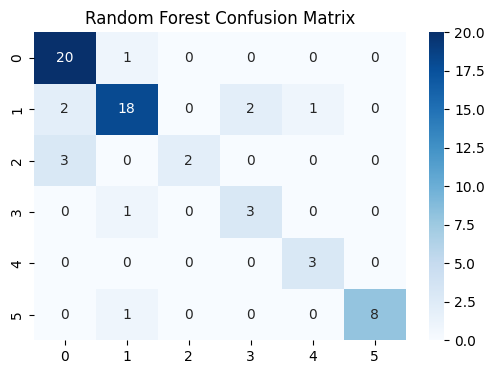

In [22]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

 **STEP 5: Bagging and Boosting**

In [23]:
# BAGGING
bag_model = BaggingClassifier(random_state=42)
bag_model.fit(X_train, y_train)
y_bag_pred = bag_model.predict(X_test)

In [24]:
print("\nBagging Classifier Report:")
print(classification_report(y_test, y_bag_pred))


Bagging Classifier Report:
              precision    recall  f1-score   support

           1       0.75      0.86      0.80        21
           2       0.81      0.74      0.77        23
           3       0.67      0.40      0.50         5
           5       0.60      0.75      0.67         4
           6       1.00      0.67      0.80         3
           7       0.80      0.89      0.84         9

    accuracy                           0.77        65
   macro avg       0.77      0.72      0.73        65
weighted avg       0.77      0.77      0.76        65



In [25]:
# BOOSTING (AdaBoost)
boost_model = AdaBoostClassifier(random_state=42)
boost_model.fit(X_train, y_train)
y_boost_pred = boost_model.predict(X_test)

In [26]:
print("\nAdaBoost Classifier Report:")
print(classification_report(y_test, y_boost_pred))


AdaBoost Classifier Report:
              precision    recall  f1-score   support

           1       0.40      0.10      0.15        21
           2       0.43      0.70      0.53        23
           3       0.17      0.20      0.18         5
           5       0.33      0.50      0.40         4
           6       0.67      0.67      0.67         3
           7       0.88      0.78      0.82         9

    accuracy                           0.46        65
   macro avg       0.48      0.49      0.46        65
weighted avg       0.47      0.46      0.42        65



In [27]:
# BOOSTING (Gradient Boosting)
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_gb_pred = gb_model.predict(X_test)

In [28]:
print("\nGradient Boosting Classifier Report:")
print(classification_report(y_test, y_gb_pred))


Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

           1       0.86      0.86      0.86        21
           2       0.91      0.87      0.89        23
           3       1.00      0.40      0.57         5
           5       0.50      0.25      0.33         4
           6       0.50      1.00      0.67         3
           7       0.75      1.00      0.86         9

    accuracy                           0.82        65
   macro avg       0.75      0.73      0.70        65
weighted avg       0.83      0.82      0.81        65



**Compare Results:**

/tmp/ipython-input-29-3052115103.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


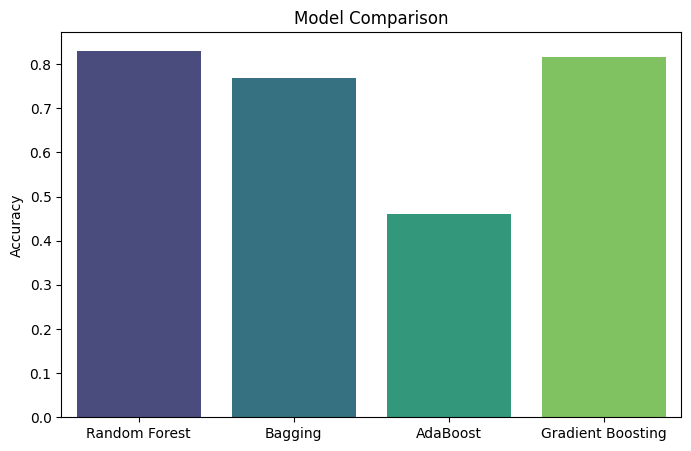

In [29]:
models = ['Random Forest', 'Bagging', 'AdaBoost', 'Gradient Boosting']
accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_bag_pred),
    accuracy_score(y_test, y_boost_pred),
    accuracy_score(y_test, y_gb_pred)
]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()

# ✅ Key Takeaways

### 🌲 Random Forest
- Robust baseline model.
- Works well on most classification/regression problems.
- Handles different feature types.
- **No need for feature scaling.**

---

### 🎒 Bagging (Bootstrap Aggregating)
- Reduces **variance** of high-variance models (e.g., decision trees).
- Combines multiple weak learners trained on **different data subsets**.
- More **stable on noisy data**.

---

### 🚀 Boosting
- Sequentially improves the model by focusing on **hard-to-classify cases**.
- Reduces **bias and variance**.
- Usually achieves **higher accuracy** but may be prone to overfitting if not tuned properly.

**Additional Notes:**

# 1. Explain Bagging and Boosting methods. How is it different from each other.

---

## 🎒 Bagging (Bootstrap Aggregating)

- Bagging stands for **Bootstrap Aggregating**.
- It builds **multiple independent models** (typically of the same type like Decision Trees).
- Each model is trained on a **random sample of the data (with replacement)**.
- Final prediction is made by **averaging** (for regression) or **majority voting** (for classification).
- Helps to **reduce variance** and avoid overfitting.

**Popular Bagging Methods:**  
- Random Forest  
- Bagged Decision Trees  

---

## 🚀 Boosting

- Boosting builds **models sequentially**, where each model tries to correct the errors of the previous one.
- Focuses more on **misclassified examples** from previous models.
- Combines weak learners to build a **stronger model**.
- Helps to **reduce both bias and variance**, making it highly accurate but prone to overfitting if not tuned properly.

**Popular Boosting Methods:**  
- AdaBoost  
- Gradient Boosting  
- XGBoost, LightGBM, CatBoost  

---

## 🔍 Key Differences Between Bagging and Boosting

| Feature                    | Bagging                           | Boosting                           |
|----------------------------|------------------------------------|------------------------------------|
| Model Training             | Parallel (independent models)     | Sequential (each corrects previous)|
| Focus                      | Reduces Variance                  | Reduces Bias and Variance          |
| Data Sampling              | Random Subsets (Bootstrap)        | Full data; focuses on errors       |
| Complexity                 | Less complex                      | More complex, needs tuning         |
| Example                    | Random Forest                     | XGBoost, AdaBoost                  |

---

✅ **Summary:**  
- **Bagging** → Builds independent models to reduce variance.  
- **Boosting** → Builds sequential models to improve overall accuracy by correcting previous mistakes.


#  2. Explain how to handle imbalance in the data.

---

## ⚠️ What is Imbalanced Data?
- Imbalanced data occurs when **one class significantly outnumbers the other(s)** in a classification problem.
- Example: Fraud Detection, Disease Diagnosis, Spam Detection.

---

## 🔧 Common Techniques to Handle Imbalanced Data

---

### 1️⃣ **Resampling Techniques**

#### 🔄 a) Oversampling
- Increase the number of minority class samples.
- Methods:
  - **Random Oversampling:** Duplicate existing minority class samples.
  - **SMOTE (Synthetic Minority Over-sampling Technique):** Generate new synthetic examples.

#### ➖ b) Undersampling
- Reduce the number of majority class samples.
- Methods:
  - **Random Undersampling:** Remove random samples from the majority class.
  - **Tomek Links / NearMiss:** Remove borderline/closest majority class samples.

---

### 2️⃣ **Algorithmic Approaches**

- Use models that handle imbalance better.
- Examples:
  - Decision Trees, Random Forests → can handle imbalance better.
  - Add **class weights** in algorithms like Logistic Regression, SVM, Random Forest:
  
Example:  
```python
model = RandomForestClassifier(class_weight='balanced')


# 🙏 Thank You! 😊